## Задание 1

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score

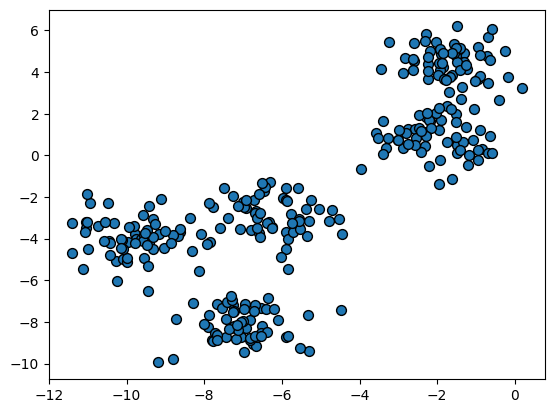

In [7]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

In [21]:
k_values = [2, 3, 4, 5, 6, 7]
results = pd.DataFrame(columns=['k', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score'])
for k in k_values:
    kmeans = KMeans(k)
    kmeans.fit(X)
    labels = kmeans.labels_
    row_results = pd.DataFrame({
                'k': [k],
                'adjusted_rand_score': [adjusted_rand_score(y, labels)],
                'homogeneity_score': [homogeneity_score(y, labels)],
                'completeness_score': [completeness_score(y, labels)]
    })
    results = pd.concat([results, row_results], ignore_index=True)
                
results

,k,adjusted_rand_score,homogeneity_score,completeness_score
0,2,0.371849,0.418166,1.000000
1,3,0.608260,0.646335,0.983964
2,4,0.768951,0.808037,0.974590
3,5,0.958356,0.953784,0.954242
4,6,0.898782,0.953784,0.883891
5,7,0.818143,0.949600,0.810022


Первая метрика отдает предпочтение 5 кластерам, вторая допускает наилучшее разбиение для двух значений: 5 и 6, а вот последняя метрика даёт следующий результат: чем меньше количество кластеров, тем лучше результат.

## Задание 2

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

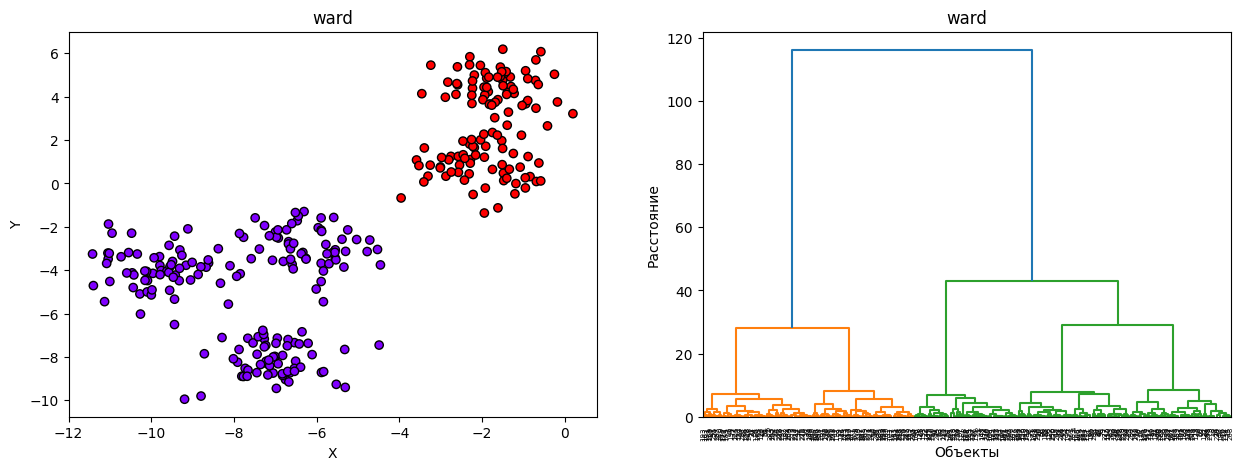

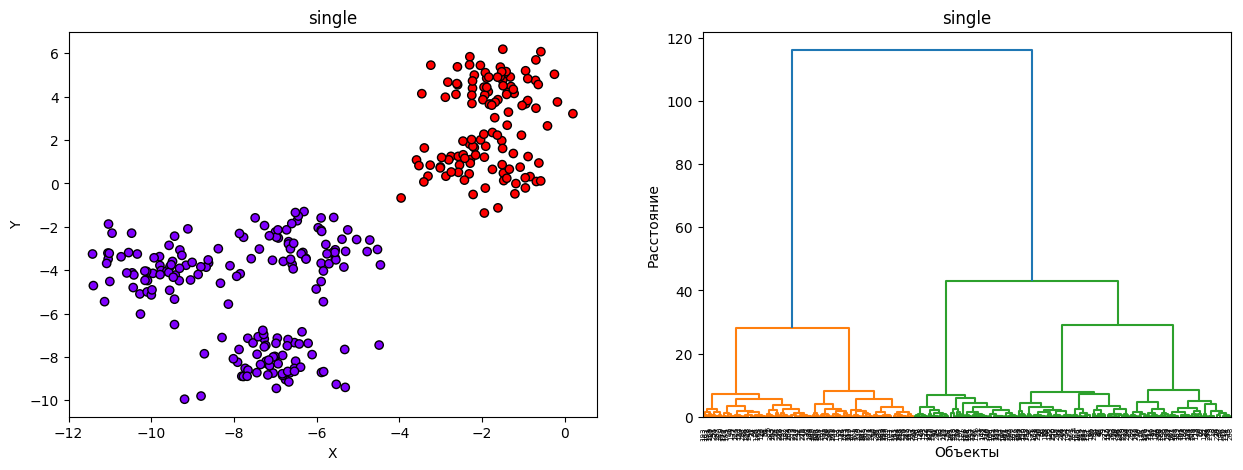

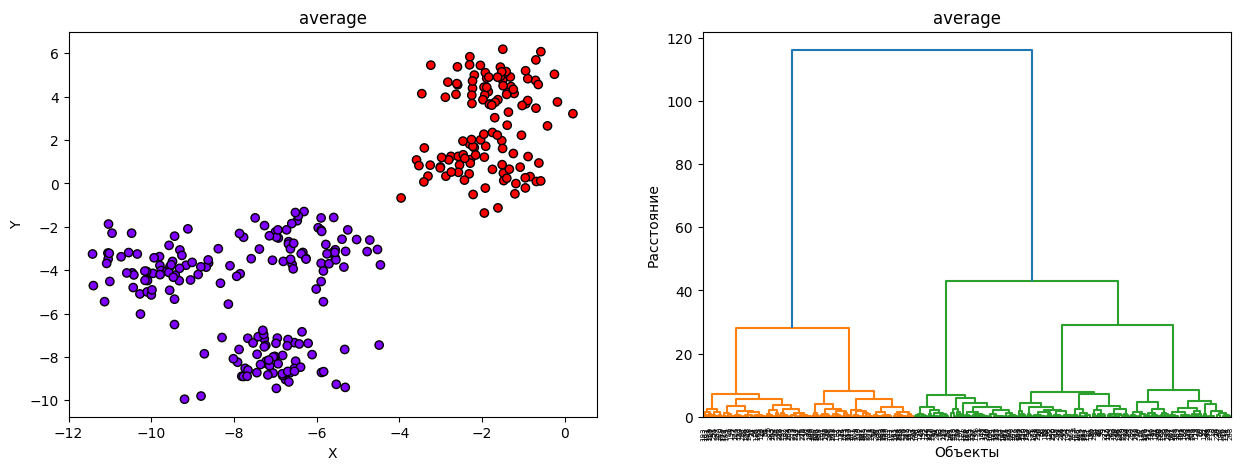

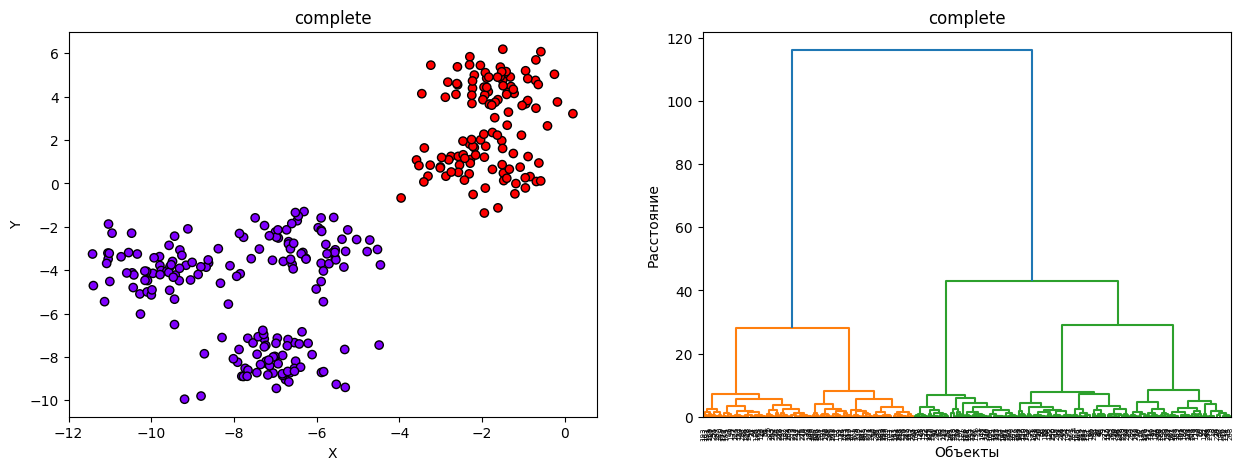

In [34]:
words = ['ward','single', 'average', 'complete']
for word in words:
    agglom_clustering = AgglomerativeClustering(linkage = word) 
    clusters = agglom_clustering.fit_predict(X)
    Z = linkage(X, method='ward')
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    axs[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap='rainbow', edgecolor='k')
    axs[0].set_title(word)
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')

    dendrogram(Z, ax=axs[1])
    axs[1].set_title(word)
    axs[1].set_xlabel('Объекты')
    axs[1].set_ylabel('Расстояние')

## Задание 3

In [40]:
from sklearn.metrics import pairwise_distances
import numpy as np

In [39]:
D = pairwise_distances(X)

Определим такую метрику для определения матрицы сходства:

In [50]:
def func(x,y):
    if np.linalg.norm(x)>=np.linalg.norm(y):
        max = x
    else:
        max = y
    return np.abs(x@y/(np.linalg.norm(max))**2)

Очевидно, все три свойства удовлетворены.

In [42]:
S = pairwise_distances(X, metric=func)

Text(0.5, 1.0, 'Матрица сходства')

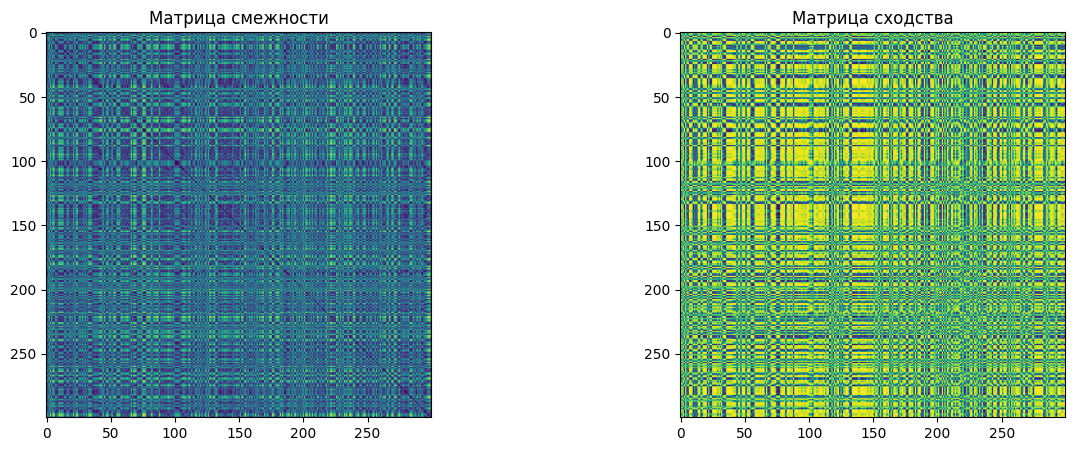

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(D)
axs[1].imshow(S)
axs[0].set_title("Матрица смежности")
axs[1].set_title("Матрица сходства")